# Example usage of `glycoproteomics` library

This will show some usage examples for manipulating spectra and calling peaks.

In [1]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("png")
figure_size = (8, 4)
dpi = 80

Read in spectrum from one of the known control samples.

In [2]:
spectrum = glycoproteomics.io.read_spectrum_file(
    os.path.join("tests", "data", "spectrum.txt.gz")
)
ions = glycoproteomics.spectrum.list_ions(spectrum)
print(ions)

['138.055', '144.066', '168.066', '186.076', '204.087', '243.026', '274.092', '292.103', '308.098', '366.139', '405.079', '485.046', '512.197', '657.235']


Plot the spectra.

In [3]:
rt_x_bin_size = 0.02
mz_y_bin_size = 2.0

binned_spectrum = glycoproteomics.spectrum.bin(
    spectrum,
    rt_x_bin_size,
    mz_y_bin_size,
    np.mean
)

(<Figure size 640x320 with 2 Axes>,
 <AxesSubplot:title={'center':'spectrum.txt.gz - 138.055'}, xlabel='RT', ylabel='MZ'>)

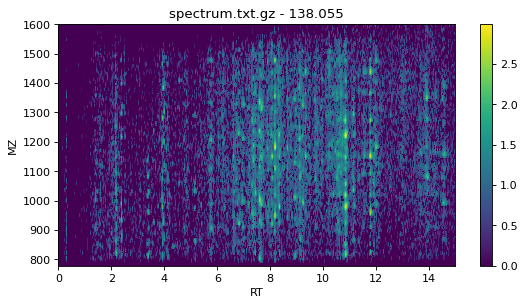

In [4]:
ion = ions[0]
ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(binned_spectrum, ion)
glycoproteomics.plotting.plot_ion_matrix(
    ion_matrix,
    x_label,
    y_label,
    "spectrum.txt.gz - " + ion,
    figure_size,
    dpi
)

Calling the top 100 peaks from this file

(<Figure size 640x320 with 2 Axes>,
 <AxesSubplot:title={'center':'spectrum.txt.gz - 138.055 - Top 100 peaks'}, xlabel='RT', ylabel='MZ'>)

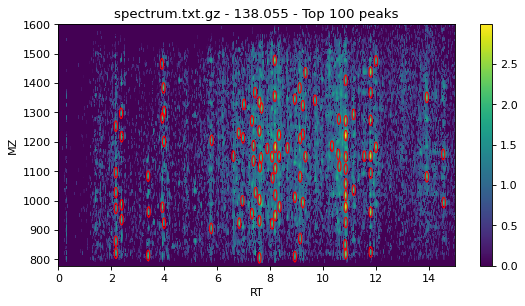

In [5]:
top_N_peaks = 100
x_radius = rt_x_bin_size * 3.0
y_radius = mz_y_bin_size * 9.0

peaks = glycoproteomics.peaks.find(
    ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    x_radius,
    y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    peaks,
    x_radius,
    y_radius,
    "spectrum.txt.gz - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)

Increasing the size of the radii to see if the peak overlap code is working correctly. This is most obvious when comparing the peaks around RT 11 and MZ 800.

(<Figure size 640x320 with 2 Axes>,
 <AxesSubplot:title={'center':'spectrum.txt.gz - 138.055 - Top 100 peaks'}, xlabel='RT', ylabel='MZ'>)

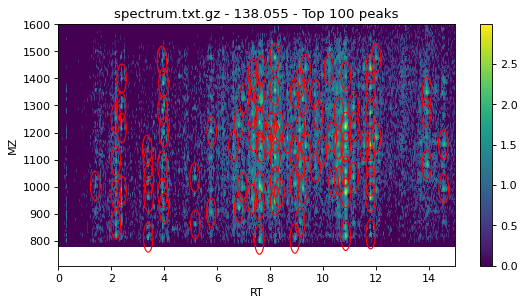

In [6]:
x_radius = rt_x_bin_size * 9.0
y_radius = mz_y_bin_size * 27.0

peaks = glycoproteomics.peaks.find(
    ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    x_radius,
    y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    peaks,
    x_radius,
    y_radius,
    "spectrum.txt.gz - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)